In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

In [7]:
# Create a DataFrame with the scaled data
scaled_data = StandardScaler().fit_transform(df_market_data)

# Set the coin_id column as index
# Copy the crypto names from the original DataFrame
df = pd.DataFrame(scaled_data, df_market_data.index, df_market_data.columns)

# Display the scaled DataFrame
df[:5]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Create a list with the number of k-values from 1 to 11
k = range(1,11)

In [10]:
# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve

inertia_df = pd.DataFrame([KMeans(i).fit(df).inertia_ for i in k],k, ['Inertia'])    
inertia_df.index.name = 'K'
inertia_df

,Inertia
K,
1,287.000000
2,212.123342
3,167.486962
4,79.022435
5,66.413051
6,55.559954
7,52.335193
8,39.791336
9,32.647241


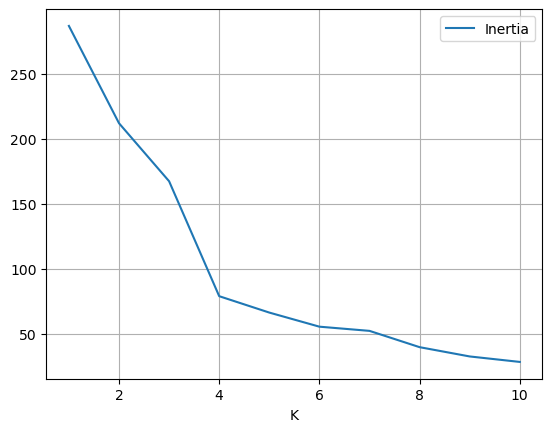

In [11]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
inertia_df.plot(grid=True);

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [12]:
# Initialize the K-Means model using the best value for k
km = KMeans(4)

In [13]:
# Fit the K-Means model using the scaled DataFrame
km.fit(df)

KMeans(n_clusters=4)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
pred = km.predict(df)

# Print the resulting array of cluster values.
pred

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0])

In [15]:
# Create a copy of the scaled DataFrame
copy_df = df.copy()

In [16]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
copy_df['clusters'] = pred

# Display the copy of the scaled DataFrame
copy_df[:5]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [17]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

copy_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color='clusters',
    hover_cols= ['coin_id']
)
    

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(3)

In [30]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(df)

# View the scaled PCA data
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [23]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
var = pca.explained_variance_ratio_
print(var)
sum(var)

[0.3719856  0.34700813 0.17603793]


0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841

In [26]:
# Create a new DataFrame with the PCA data.
# Copy the crypto names from the original scaled DataFrame
# Set the coin_id column as index
pca_df = pd.DataFrame(pca_data, df.index, ['PCA1','PCA2','PCA3'])

# Display the scaled PCA DataFrame
pca_df[:5]

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [29]:
# Create a list with the number of k-values from 1 to 11
list(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [31]:
# Create an empty list to store the inertia values
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve

pca_inertia_df = pd.DataFrame([KMeans(i).fit(pca_df).inertia_ for i in k],k, ['Inertia'])   

<Axes: >

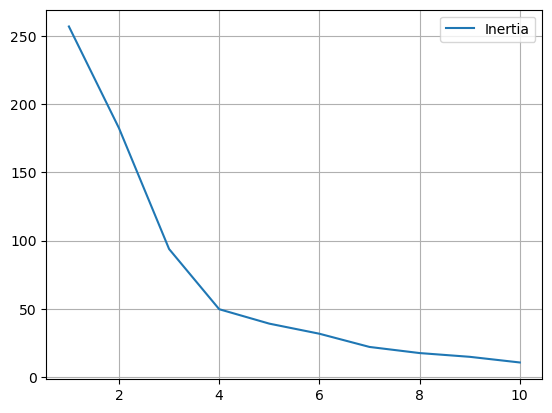

In [33]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_inertia_df.plot(grid=True)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [34]:
# Initialize the K-Means model using the best value for k
pca_km = KMeans(4)

In [35]:
# Fit the K-Means model using the PCA data
pca_km.fit(pca_df)

KMeans(n_clusters=4)

In [36]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_pred = pca_km.predict(pca_df)

# Print the resulting array of cluster values.
pca_pred

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [38]:
# Create a copy of the scaled PCA DataFrame
pca_copy_df = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
pca_copy_df['clusters'] = pca_pred

# Display the copy of the scaled PCA DataFrame
pca_copy_df[:5]

,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,3
ripple,-0.471835,-0.222660,-0.479053,3
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [39]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

pca_copy_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    color='clusters',
    hover_cols = ['coin_id']
)

:Scatter   [PCA1]   (PCA2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

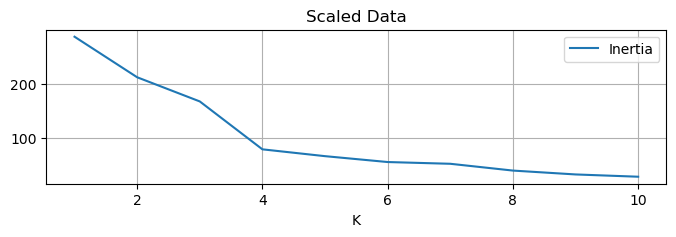

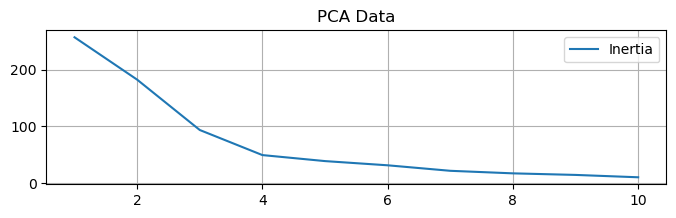

In [87]:
# Composite plot to contrast the Elbow curves
inertia_df.plot(figsize=[8,2],title='Scaled Data',grid=True); 
pca_inertia_df.plot(figsize=[8,2], title='PCA Data',grid=True);

In [101]:
# Composite plot to contrast the clusters
plot1 = copy_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    color='clusters',
    hover_cols= ['coin_id'],
    title='Scaled Data Clusters',
    width = 400    
) 

plot2 = pca_copy_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    color='clusters',
    hover_cols = ['coin_id'],
    title='PCA Clusters',
    width=400
)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The KMean inertia seem to match but the classes are different.  

In [102]:
plot1 + plot2

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)
   .Scatter.II :Scatter   [PCA1]   (PCA2,clusters,coin_id)